# Guided Project: Visualizing The Gender Gap In College Degrees 

In this guided project, we'll extend the work we did in the last two missions on visualizing the gender gap across college degrees. So far, we mostly focused on the STEM degrees but now we will generate line charts to compare across all degree categories. In the last step of this guided project, we'll explore how to export the final diagram we create as an image file. You can download the solutions for this guided project [here](https://github.com/dataquestio/solutions/blob/master/Mission149Solutions.ipynb).

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
women_degrees = pd.read_csv('data/percent-bachelors-degrees-women-usa.csv')

In [3]:
stem_cats = ['Psychology', 'Biology', 'Math and Statistics', 'Physical Sciences', 'Computer Science', 'Engineering', 'Computer Science']
lib_arts_cats = ['Foreign Languages', 'English', 'Communications and Journalism', 'Art and Performance', 'Social Sciences and History']
other_cats = ['Health Professions', 'Public Administration', 'Education', 'Agriculture','Business', 'Architecture']

In [4]:
print(len(stem_cats), len(lib_arts_cats), len(other_cats))

7 5 6


* Generate a 6 row by 3 column grid of subplots.
* In the first column:
  * Generate line charts for both male and female percentages for every degree in `stem_cats`.
  * Add text annotations for `Women` and `Men` in the topmost and bottommost plots.
* In the second column:
  * Generate line charts for both male and female percentages for every degree in `lib_arts_cats`.
  * Add text annotations for `Women` and `Men` for only the topmost plot (since the lines overlap at the end in the bottommost plot).
* In the third column:
  * Generate line charts for both male and female percentages for every degree in `other_cats`.
  * Add text annotations for `Women` and `Men` in the topmost and bottommost plots.

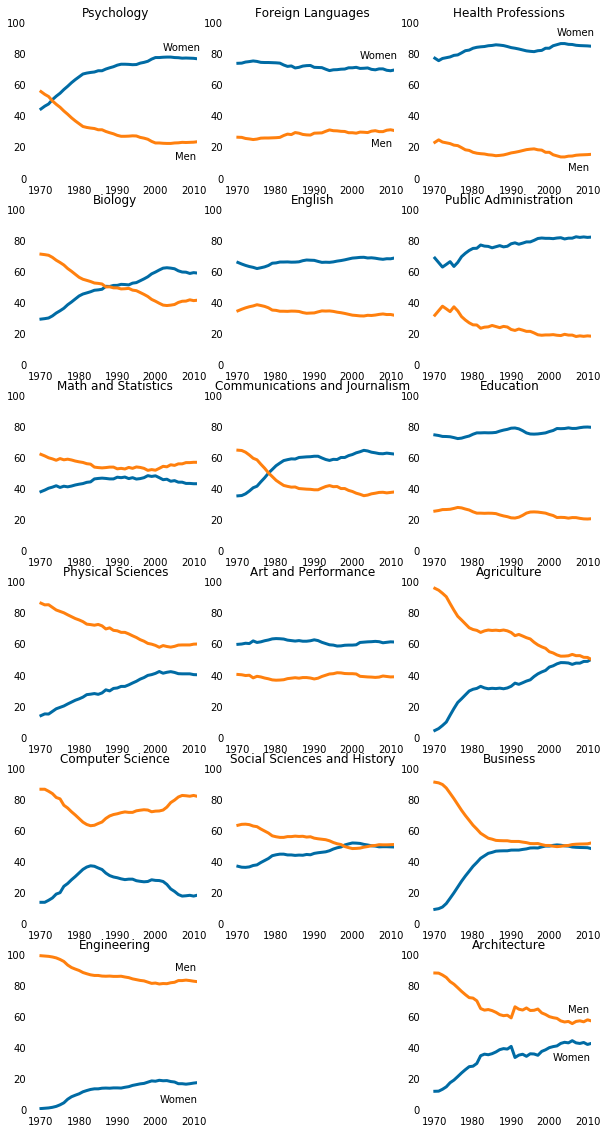

In [10]:
cb_dark_blue = (0/255,107/255,164/255)
cb_orange = (255/255, 128/255, 14/255)

fig = plt.figure(figsize=(10, 20))

for sp in range(18):
  
    if (sp+1) != 17:
        ax = fig.add_subplot(6,3,sp+1)

        # for the first column of 6X3 subplots grid - stem_cats
        # 1, 4, 7, 10, 13, 16
        if (sp+1) % 3 == 1:

            ax.plot(women_degrees['Year'], women_degrees[stem_cats[(sp+1)//3]], c=cb_dark_blue, label='Women', linewidth=3)
            ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[(sp+1)//3]], c=cb_orange, label='Men', linewidth=3)
            ax.set_title(stem_cats[(sp+1)//3])

            if sp+1 == 1:
                ax.text(2002, 82, 'Women')
                ax.text(2005, 12, 'Men')

            elif sp+1 == 16:
                ax.text(2005, 90, 'Men')
                ax.text(2001, 5, 'Women')

        # for the second column of 6X3 subplots grid - lib_arts_cats
        # 2, 5, 8, 11, 14
        elif ((sp+1) % 3 == 2) and (sp+1 != 17) :

            ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[(sp+1)//3]], c=cb_dark_blue, label='Women', linewidth=3)
            ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[(sp+1)//3]], c=cb_orange, label='Men', linewidth=3)
            ax.set_title(lib_arts_cats[(sp+1)//3])

            if sp+1 == 2:
                ax.text(2002, 77, 'Women')
                ax.text(2005, 20, 'Men')

        # for the third column of 6X3 subplots grid - stem_cats
        # 3, 6, 9, 12, 15, 18   
        elif (sp+1) % 3 == 0:

            ax.plot(women_degrees['Year'], women_degrees[other_cats[(sp+1)//3-1]], c=cb_dark_blue, label='Women', linewidth=3)
            ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[(sp+1)//3-1]], c=cb_orange, label='Men', linewidth=3)
            ax.set_title(other_cats[(sp+1)//3-1])

            if sp+1 == 3:
                ax.text(2002, 92, 'Women')
                ax.text(2005, 5, 'Men')

            elif sp+1 == 18:
                ax.text(2005, 63, 'Men')
                ax.text(2001, 32, 'Women')

        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False)
        ax.spines["top"].set_visible(False)    
        ax.spines["bottom"].set_visible(False)
        ax.set_xlim(1968, 2011)
        ax.set_ylim(0,100)

        ax.tick_params(bottom="off", top="off", left="off", right="off")

plt.savefig('exported_graph_images/gender_degrees_1.png')
plt.show()

With seventeen line charts in one diagram, the non-data elements quickly clutter the field of view. **The most immediate issue that sticks out is the titles of some line charts overlapping with the x-axis labels for the line chart above it.** If we remove the titles for each line chart, the viewer won't know what degree each line chart refers to. 

### Let's instead remove the x-axis labels for every line chart in a column except for the bottom most one.
We can accomplish this by modifying the call to `Axes.tick_params()` and setting labelbottom to off:
```python
ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom='off')
```
This will disable the x-axis labels for all of the line charts. You can then enable the x-axis labels for the bottommost line charts in each column:
```python
ax.tick_params(labelbottom='on')
```

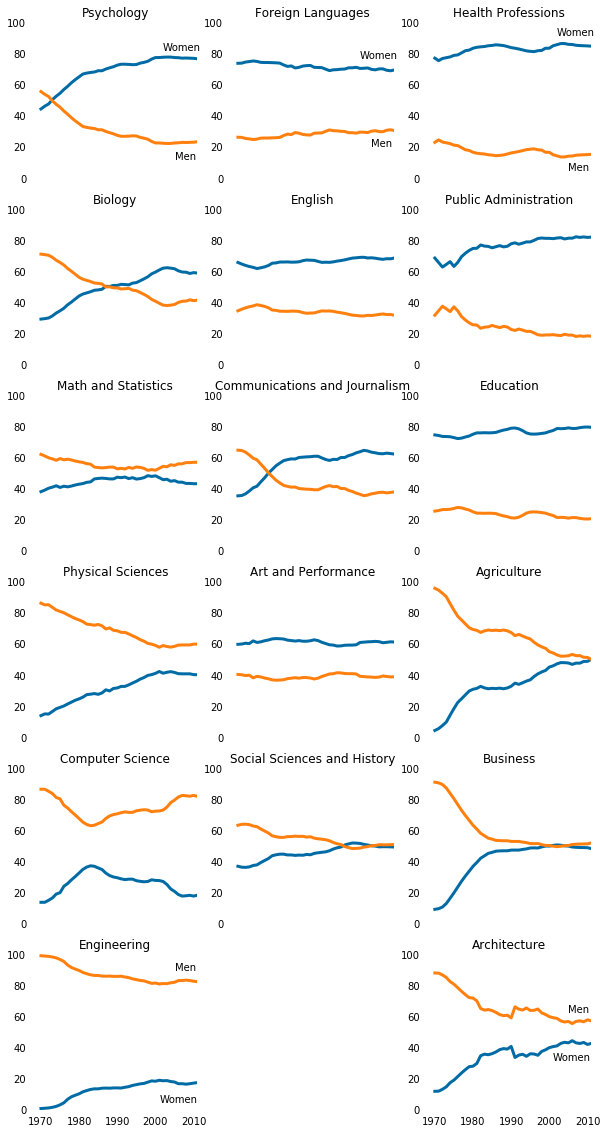

In [11]:
fig = plt.figure(figsize=(10, 20))

for sp in range(18):
  
    if (sp+1) != 17:
        ax = fig.add_subplot(6,3,sp+1)

        # for the first column of 6X3 subplots grid - stem_cats
        # 1, 4, 7, 10, 13, 16
        if (sp+1) % 3 == 1:

            ax.plot(women_degrees['Year'], women_degrees[stem_cats[(sp+1)//3]], c=cb_dark_blue, label='Women', linewidth=3)
            ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[(sp+1)//3]], c=cb_orange, label='Men', linewidth=3)
            ax.set_title(stem_cats[(sp+1)//3])

            if sp+1 == 1:
                ax.text(2002, 82, 'Women')
                ax.text(2005, 12, 'Men')

            elif sp+1 == 16:
                ax.text(2005, 90, 'Men')
                ax.text(2001, 5, 'Women')

        # for the second column of 6X3 subplots grid - lib_arts_cats
        # 2, 5, 8, 11, 14
        elif ((sp+1) % 3 == 2) and (sp+1 != 17) :

            ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[(sp+1)//3]], c=cb_dark_blue, label='Women', linewidth=3)
            ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[(sp+1)//3]], c=cb_orange, label='Men', linewidth=3)
            ax.set_title(lib_arts_cats[(sp+1)//3])

            if sp+1 == 2:
                ax.text(2002, 77, 'Women')
                ax.text(2005, 20, 'Men')

        # for the third column of 6X3 subplots grid - stem_cats
        # 3, 6, 9, 12, 15, 18   
        elif (sp+1) % 3 == 0:

            ax.plot(women_degrees['Year'], women_degrees[other_cats[(sp+1)//3-1]], c=cb_dark_blue, label='Women', linewidth=3)
            ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[(sp+1)//3-1]], c=cb_orange, label='Men', linewidth=3)
            ax.set_title(other_cats[(sp+1)//3-1])

            if sp+1 == 3:
                ax.text(2002, 92, 'Women')
                ax.text(2005, 5, 'Men')

            elif sp+1 == 18:
                ax.text(2005, 63, 'Men')
                ax.text(2001, 32, 'Women')

        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False)
        ax.spines["top"].set_visible(False)    
        ax.spines["bottom"].set_visible(False)
        ax.set_xlim(1968, 2011)
        ax.set_ylim(0,100)

        ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom="off")
        
        if (sp+1) >= 16:
            ax.tick_params(labelbottom="on")

plt.savefig('exported_graph_images/gender_degrees_2.png')            
plt.show()

Removing the x-axis labels for all but the bottommost plots solved the issue we noticed with the overlapping text. In addition, the plots are cleaner and more readable. The trade-off we made is that it's now more difficult for the viewer to discern approximately which years some interesting changes in trends may have happened. This is acceptable because we're primarily interested in enabling the viewer to quickly get a high level understanding of which degrees are prone to gender imbalance and how has that changed over time.

### let's also simplify the y-axis labels.
Currently, all seventeen plots have six y-axis labels and even though they are consistent across the plots, they still add to the visual clutter. By keeping just the starting and ending labels (0 and 100), we can keep some of the benefits of having the y-axis labels to begin with.

* We can use the `Axes.set_yticks()` method to specify which labels we want displayed. The following code enables just the 0 and 100 labels to be displayed:

```python
ax.set_yticks([0,100])
```

* For all plots:
  * Enable just the y-axis labels at 0 and 100.
* Click [here](https://s3.amazonaws.com/dq-content/149_setting_y_axis_labels.png) to see what the diagram should look like.

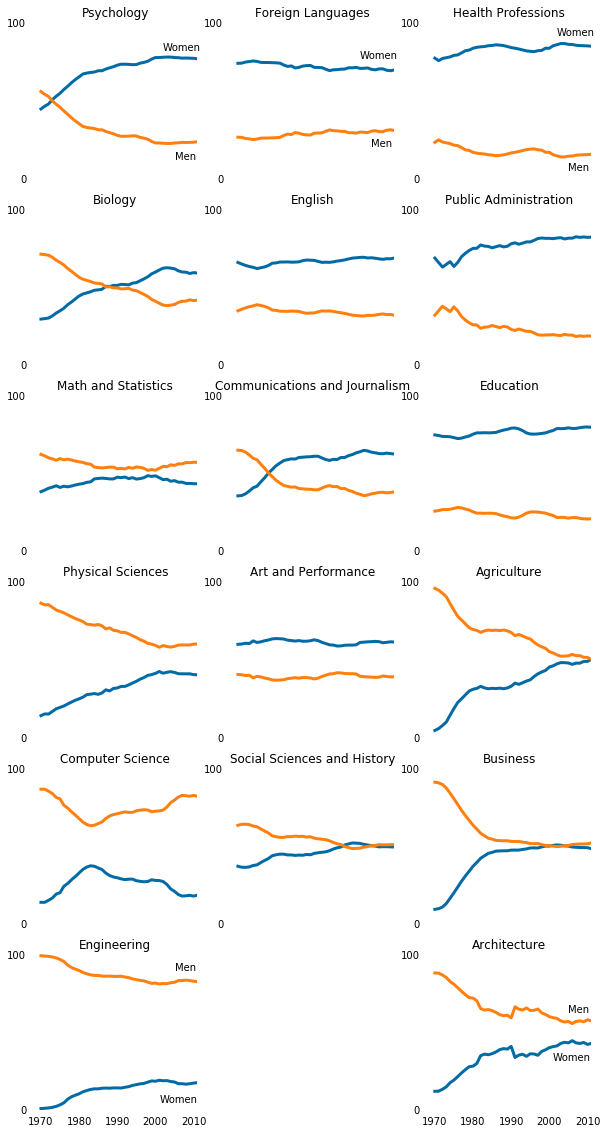

In [12]:
fig = plt.figure(figsize=(10, 20))

for sp in range(18):
  
    if (sp+1) != 17:
        ax = fig.add_subplot(6,3,sp+1)

        # for the first column of 6X3 subplots grid - stem_cats
        # 1, 4, 7, 10, 13, 16
        if (sp+1) % 3 == 1:

            ax.plot(women_degrees['Year'], women_degrees[stem_cats[(sp+1)//3]], c=cb_dark_blue, label='Women', linewidth=3)
            ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[(sp+1)//3]], c=cb_orange, label='Men', linewidth=3)
            ax.set_title(stem_cats[(sp+1)//3])

            if sp+1 == 1:
                ax.text(2002, 82, 'Women')
                ax.text(2005, 12, 'Men')

            elif sp+1 == 16:
                ax.text(2005, 90, 'Men')
                ax.text(2001, 5, 'Women')

        # for the second column of 6X3 subplots grid - lib_arts_cats
        # 2, 5, 8, 11, 14
        elif ((sp+1) % 3 == 2) and (sp+1 != 17) :

            ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[(sp+1)//3]], c=cb_dark_blue, label='Women', linewidth=3)
            ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[(sp+1)//3]], c=cb_orange, label='Men', linewidth=3)
            ax.set_title(lib_arts_cats[(sp+1)//3])

            if sp+1 == 2:
                ax.text(2002, 77, 'Women')
                ax.text(2005, 20, 'Men')

        # for the third column of 6X3 subplots grid - stem_cats
        # 3, 6, 9, 12, 15, 18   
        elif (sp+1) % 3 == 0:

            ax.plot(women_degrees['Year'], women_degrees[other_cats[(sp+1)//3-1]], c=cb_dark_blue, label='Women', linewidth=3)
            ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[(sp+1)//3-1]], c=cb_orange, label='Men', linewidth=3)
            ax.set_title(other_cats[(sp+1)//3-1])

            if sp+1 == 3:
                ax.text(2002, 92, 'Women')
                ax.text(2005, 5, 'Men')

            elif sp+1 == 18:
                ax.text(2005, 63, 'Men')
                ax.text(2001, 32, 'Women')

        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False)
        ax.spines["top"].set_visible(False)    
        ax.spines["bottom"].set_visible(False)
        ax.set_xlim(1968, 2011)
        ax.set_ylim(0,100)

        ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom="off")
        if (sp+1) >= 16:
            ax.tick_params(labelbottom="on")

        ax.set_yticks([0,100])
            
plt.savefig('exported_graph_images/gender_degrees_3.png')
plt.show()

While removing most of the y-axis labels definitely reduced clutter, 
### it also made it hard to understand which degrees have close to 50-50 gender breakdown. 
While keeping all of the y-axis labels would have made it easier, we can actually do one better and use a horizontal line across all of the line charts where the y-axis label 50 would have been.

### We can generate a horizontal line across an entire subplot using the Axes.axhline() method. 
The only required parameter is the y-axis location for the start of the line:

```python
ax.axhline(50)
```
Let's use the next color in the [Color Blind 10 palette](http://tableaufriction.blogspot.ro/2012/11/finally-you-can-use-tableau-data-colors.html) for this horizontal line, which has an RGB value of (171, 171, 171). Because we don't want this line to clutter the viewing experience, let's increase the transparency of the line. We can set the color using the c parameter and the transparency using the alpha parameter. The value passed in to the alpha parameter must range between 0 and 1:

```python
ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
```

For all plots:
* Generate a horizontal line with the following properties:
  * Starts at the y-axis position 50
  * Set to the third color (light gray) in the Color Blind 10 palette
  * Has a transparency of 0.3

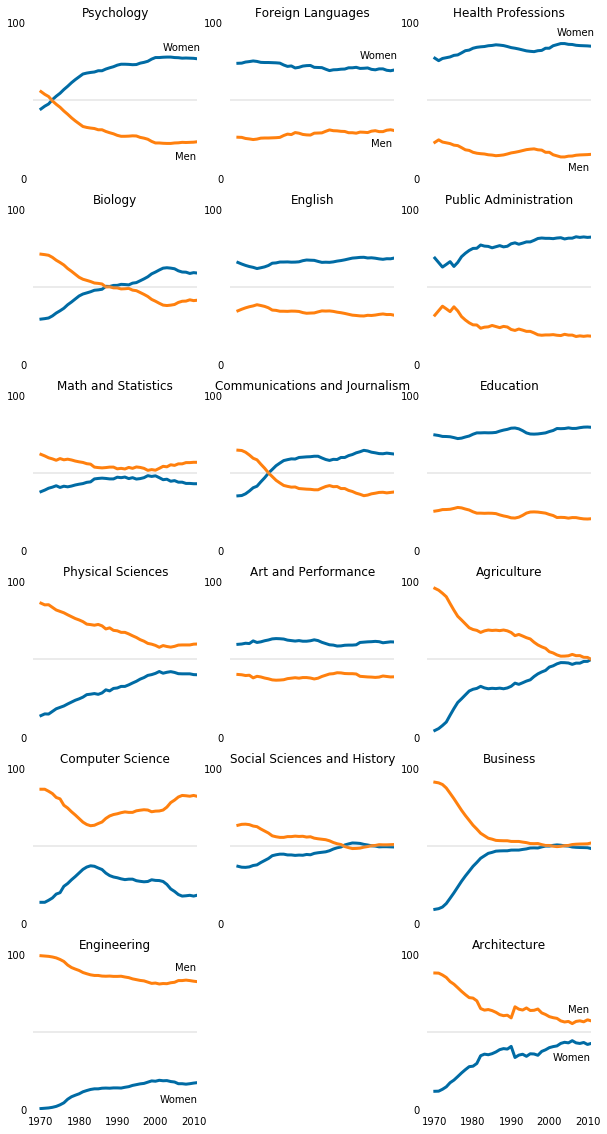

In [13]:
fig = plt.figure(figsize=(10, 20))

for sp in range(18):
  
    if (sp+1) != 17:
        ax = fig.add_subplot(6,3,sp+1)

        # for the first column of 6X3 subplots grid - stem_cats
        # 1, 4, 7, 10, 13, 16
        if (sp+1) % 3 == 1:

            ax.plot(women_degrees['Year'], women_degrees[stem_cats[(sp+1)//3]], c=cb_dark_blue, label='Women', linewidth=3)
            ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[(sp+1)//3]], c=cb_orange, label='Men', linewidth=3)
            ax.set_title(stem_cats[(sp+1)//3])

            if sp+1 == 1:
                ax.text(2002, 82, 'Women')
                ax.text(2005, 12, 'Men')

            elif sp+1 == 16:
                ax.text(2005, 90, 'Men')
                ax.text(2001, 5, 'Women')

        # for the second column of 6X3 subplots grid - lib_arts_cats
        # 2, 5, 8, 11, 14
        elif ((sp+1) % 3 == 2) and (sp+1 != 17) :

            ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[(sp+1)//3]], c=cb_dark_blue, label='Women', linewidth=3)
            ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[(sp+1)//3]], c=cb_orange, label='Men', linewidth=3)
            ax.set_title(lib_arts_cats[(sp+1)//3])

            if sp+1 == 2:
                ax.text(2002, 77, 'Women')
                ax.text(2005, 20, 'Men')

        # for the third column of 6X3 subplots grid - stem_cats
        # 3, 6, 9, 12, 15, 18   
        elif (sp+1) % 3 == 0:

            ax.plot(women_degrees['Year'], women_degrees[other_cats[(sp+1)//3-1]], c=cb_dark_blue, label='Women', linewidth=3)
            ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[(sp+1)//3-1]], c=cb_orange, label='Men', linewidth=3)
            ax.set_title(other_cats[(sp+1)//3-1])

            if sp+1 == 3:
                ax.text(2002, 92, 'Women')
                ax.text(2005, 5, 'Men')

            elif sp+1 == 18:
                ax.text(2005, 63, 'Men')
                ax.text(2001, 32, 'Women')

        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False)
        ax.spines["top"].set_visible(False)    
        ax.spines["bottom"].set_visible(False)
        ax.set_xlim(1968, 2011)
        ax.set_ylim(0,100)

        ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom="off")
        if (sp+1) >= 16:
            ax.tick_params(labelbottom="on")

        ax.set_yticks([0,100])
        ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
            
plt.show()

If you recall, matplotlib can be used many different ways. It can be used within a Jupyter Notebook interface (like this one), from the command line, or in an integrated development environment. Many of these ways of using matplotlib vary in workflow and handle the rendering of images differently as well. To help support these different use cases, matplotlib can target different outputs or **backends**. If you import matplotlib and run `matplotlib.get_backend()`, you'll see the specific backend you're currently using.

* With the current backend we're using, we can use [Figure.savefig()](http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure.savefig) or [pyplot.savefig()](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.savefig) to export all of the plots contained in the figure as a single image file. Note that these have to be called before we display the figure using `pyplot.show()`.:

```python
plt.plot(women_degrees['Year'], women_degrees['Biology'])
plt.savefig('biology_degrees.png')
```
In the above code, we saved a line chart as a PNG file. You can read about the different popular file types for images [here](https://www.sitepoint.com/gif-png-jpg-which-one-to-use/). The image will be exported into the same folder that your Jupyter Notebook server is running. You can click on the **Jupyter** logo to navigate the file system and find this image:

* [Jupyter Logo](https://s3.amazonaws.com/dq-content/jupyter_logo.png)

Exporting plots we create using matplotlib allows us to use them in Word documents, Powerpoint presentations, and even in emails.


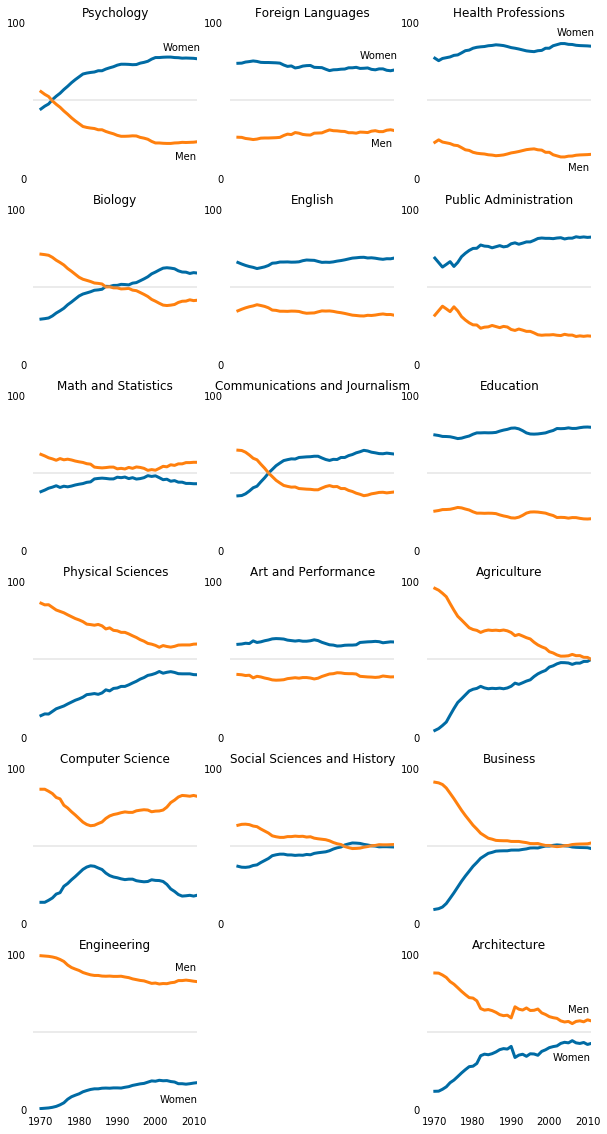

In [14]:
# Export the figure containing all of the line charts to "gender_degrees.png".

fig = plt.figure(figsize=(10, 20))

for sp in range(18):
  
    if (sp+1) != 17:
        ax = fig.add_subplot(6,3,sp+1)

        # for the first column of 6X3 subplots grid - stem_cats
        # 1, 4, 7, 10, 13, 16
        if (sp+1) % 3 == 1:

            ax.plot(women_degrees['Year'], women_degrees[stem_cats[(sp+1)//3]], c=cb_dark_blue, label='Women', linewidth=3)
            ax.plot(women_degrees['Year'], 100-women_degrees[stem_cats[(sp+1)//3]], c=cb_orange, label='Men', linewidth=3)
            ax.set_title(stem_cats[(sp+1)//3])

            if sp+1 == 1:
                ax.text(2002, 82, 'Women')
                ax.text(2005, 12, 'Men')

            elif sp+1 == 16:
                ax.text(2005, 90, 'Men')
                ax.text(2001, 5, 'Women')

        # for the second column of 6X3 subplots grid - lib_arts_cats
        # 2, 5, 8, 11, 14
        elif ((sp+1) % 3 == 2) and (sp+1 != 17) :

            ax.plot(women_degrees['Year'], women_degrees[lib_arts_cats[(sp+1)//3]], c=cb_dark_blue, label='Women', linewidth=3)
            ax.plot(women_degrees['Year'], 100-women_degrees[lib_arts_cats[(sp+1)//3]], c=cb_orange, label='Men', linewidth=3)
            ax.set_title(lib_arts_cats[(sp+1)//3])

            if sp+1 == 2:
                ax.text(2002, 77, 'Women')
                ax.text(2005, 20, 'Men')

        # for the third column of 6X3 subplots grid - stem_cats
        # 3, 6, 9, 12, 15, 18   
        elif (sp+1) % 3 == 0:

            ax.plot(women_degrees['Year'], women_degrees[other_cats[(sp+1)//3-1]], c=cb_dark_blue, label='Women', linewidth=3)
            ax.plot(women_degrees['Year'], 100-women_degrees[other_cats[(sp+1)//3-1]], c=cb_orange, label='Men', linewidth=3)
            ax.set_title(other_cats[(sp+1)//3-1])

            if sp+1 == 3:
                ax.text(2002, 92, 'Women')
                ax.text(2005, 5, 'Men')

            elif sp+1 == 18:
                ax.text(2005, 63, 'Men')
                ax.text(2001, 32, 'Women')

        ax.spines["right"].set_visible(False)    
        ax.spines["left"].set_visible(False)
        ax.spines["top"].set_visible(False)    
        ax.spines["bottom"].set_visible(False)
        ax.set_xlim(1968, 2011)
        ax.set_ylim(0,100)

        ax.tick_params(bottom="off", top="off", left="off", right="off", labelbottom="off")
        if (sp+1) >= 16:
            ax.tick_params(labelbottom="on")

        ax.set_yticks([0,100])
        ax.axhline(50, c=(171/255, 171/255, 171/255), alpha=0.3)
            
plt.savefig('exported_graph_images/gender_degrees_4(fin).png')
plt.show()